In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dfx=pd.read_csv("weightedX.csv")
dfy=pd.read_csv("weightedY.csv")
x=dfx.values
y=dfy.values

In [3]:
print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


In [9]:
u=x.mean()
std=x.std()
X=(x-u)/std

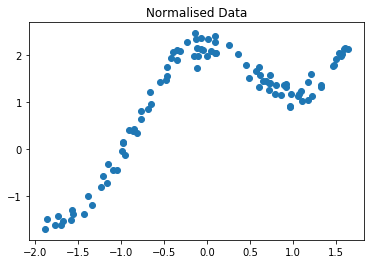

In [10]:
plt.scatter(X,y)
plt.title("Normalised Data")
plt.show()

In [41]:
def getW(querypoint,X,tau):
    m=X.shape[0]
    W=np.mat(np.eye(m))
    for i in range(m):
        xi=X[i]
        x=querypoint
        W[i,i]=np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
        return W        

In [42]:
X=np.mat(X)
Y=np.mat(y)
w=getW(-1.0,X,100)
print(w.shape)

(99, 99)


In [43]:
def prediction(X,Y,queryx,tau):
    m=X.shape[0]
    ones = np.ones((m,1))
    X_ = np.hstack((X,ones))
    
    qx = np.mat([queryx,1])
    
    W = getW(qx,X_,tau)
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred = np.dot(qx,theta)
    return theta,pred

In [44]:
theta,pred = prediction(X,Y,1.0,1.0)

In [45]:
print(theta)

[[0.84419018]
 [1.02280425]]


In [46]:
print(pred)

[[1.86699443]]


In [47]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = prediction(X,Y,xq,tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.title("Tau/Bandwidth Param %.2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()

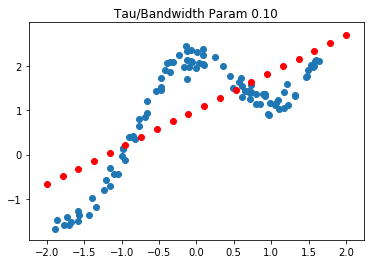

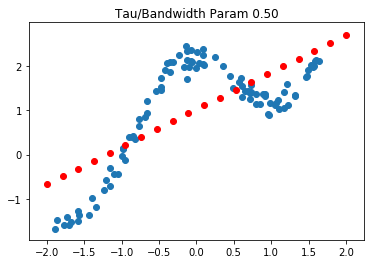

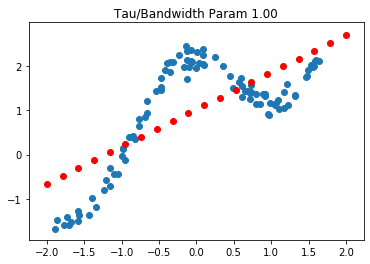

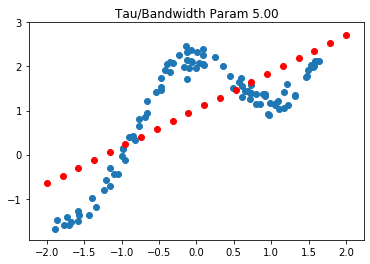

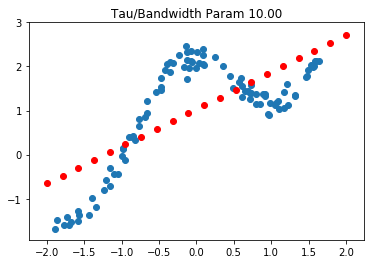

In [48]:
taus = [0.1,0.5,1,5,10]
for t in taus:
    plotPrediction(t)